In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
datasets = ('3A4', 'CB1', 'DPP4', 'HIVINT', 'HIVPROT', 'LOGD', 'METAB', 'NK1', 'OX1', 'OX2', 'PGP', 'PPB', 'RAT_F', 'TDI', 'THROMBIN')

In [5]:
# test building model with using one of the dataset
dataset = '3A4'
train = pd.read_csv('../merck.data/csv/%s_training_disguised.csv' % dataset)
test = pd.read_csv('../merck.data//csv/%s_test_disguised.csv' % dataset)

In [6]:
# only use classifiers exists in both train and test sets
cols = set(train.columns)
cols = cols.intersection(set(test.columns))
print(len(cols), "unique descriptors")

6561 unique descriptors


In [7]:
# use first 75% of data; time-split
l = len(train)
#train_x = train[:int(l*0.75)].filter(cols).drop(['MOLECULE', 'Act'], axis=1)
#train_y = train[:int(l*0.75)].filter(['Act']).values.ravel()

# for testing, we will use all data
train_x = train.filter(cols).drop(['MOLECULE', 'Act'], axis=1).values
train_y = train.filter(['Act']).values
test_x = test.filter(cols).drop(['MOLECULE', 'Act'], axis=1).values
test_y = test.filter(['Act']).values.ravel()

In [8]:
# transformation
train_x = np.log(train_x + 1)
test_x = np.log(test_x + 1)

In [9]:
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2

input_dim = train_x.shape[1]
model = Sequential([
    Dense(4000, input_dim=input_dim, kernel_initializer='lecun_uniform', kernel_regularizer=l2(0.0001)),
    Activation('relu'),
    Dropout(0.25),
        
    Dense(2000, kernel_initializer='lecun_uniform', kernel_regularizer=l2(0.0001)),
    Activation('relu'),
    Dropout(0.25),
        
    Dense(1000, kernel_initializer='lecun_uniform', kernel_regularizer=l2(0.0001)),
    Activation('relu'),
    Dropout(0.25),
        
    Dense(1000, kernel_initializer='lecun_uniform', kernel_regularizer=l2(0.0001)),
    Activation('relu'),
    Dropout(0.1),
        
    Dense(1)
])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
#from keras.models import load_model
#model = load_model('model/%s_model.h5' % dataset)

In [11]:
sgd = SGD(lr=0.0001, momentum=0.9)
rmsprop = RMSprop()
model.compile(loss='mse', optimizer=sgd)
model.fit(train_x, train_y, nb_epoch=5, batch_size=32)

Instructions for updating:
Use tf.cast instead.


/home/sunhwan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/5
37241/37241 [==============================] - 32s 862us/step - loss: 1.4769
Epoch 2/5
10656/37241 [=======>......................] - ETA: 22s - loss: 1.1274

KeyboardInterrupt: 

In [17]:
y_pred = model.predict(test_x).ravel()
print(y_pred)

[29.46032  35.879074 23.123741 20.207203 28.6366   40.16816  31.64677
 38.91156  22.393435 67.413086 42.679825 25.764454 46.89656  26.750683
 45.35844  47.91347  32.08223  49.58542  23.496136 37.36458  64.49316
 51.751072 45.49759  67.63562  32.38677  32.193913 30.52438  29.713627
 33.546265 51.438316 21.48434  60.46156  47.55727  20.575256 32.66951
 47.561195 46.916824 61.940624 15.504766 16.512728 44.99257  23.123741
 62.676895 61.59868  39.467365 46.64437  26.097256 24.980076 25.440111
 29.615181 29.567707 23.088552 56.677185 38.59376  24.150911 45.023205
 48.69146  35.411194 19.806519 19.610474 19.610474 21.679691 21.679691
 62.758858 61.23805  22.11026  31.62571  28.057907 33.911358 44.414867
 43.23113  52.150536 66.122116 69.85897  41.413986 41.413986 53.406055
 31.55399  30.054817 25.396341 21.140396 32.66151  58.43012  53.59661
 20.924435 32.99308  41.214546 29.850094 71.826294 47.621376 32.031708
 29.32402  38.004284 48.66243  53.78284  35.04418  33.56432  24.25629
 25.62981  

In [18]:
def Rsquared(x, y):
    avx = np.average(x)
    avy = np.average(y)
    num = np.sum( (x-avx)*(y-avy) )**2
    denom = np.sum( (x-avx)**2 ) * np.sum( (y-avy)**2 )
    return num/denom

In [19]:
Rsquared(test_y, y_pred)

0.4005498291658824

In [20]:
y_pred = pd.read_csv('csv/%s_prediction.csv' % dataset)['Act'].values

FileNotFoundError: File b'csv/METAB_prediction.csv' does not exist

In [21]:
idx = np.logical_and(test_y > 0, test_y < 10).flatten()

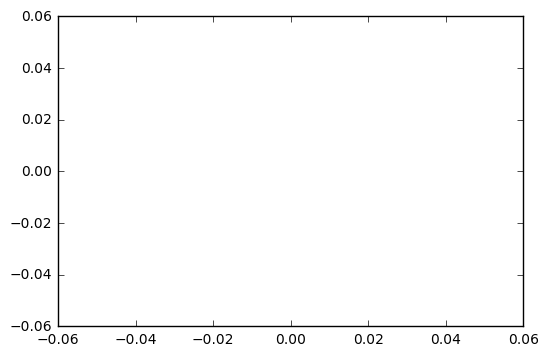

In [56]:
plt.scatter(test_y, y_pred)